<a href="https://colab.research.google.com/github/violetjzt/STQD6324-P150177/blob/main/Model_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Model Classification--Additional Elements That Support My Analysis**

In [15]:
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, precision_recall_curve, auc

In [2]:
os.getcwd()

'/content'

In [12]:
# Load the cleaned dataset
news_df = pd.read_csv('/content/drive/MyDrive/Cleaned_News_Dataset.csv')

# Combine title and text for richer representation
news_df['combined_text'] = news_df['title'] + ' ' + news_df['text']

# TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X = vectorizer.fit_transform(news_df['combined_text'])
y = news_df['label']  # 0 for Fake, 1 for True

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Remove NaNs from y_train and X_train
non_nan_indices_train = ~y_train.isna()
X_train = X_train[non_nan_indices_train.to_numpy()]
y_train = y_train[non_nan_indices_train]

# Remove NaNs from y_test and X_test
non_nan_indices_test = ~y_test.isna()
X_test = X_test[non_nan_indices_test.to_numpy()]
y_test = y_test[non_nan_indices_test]

print("Data preparation and vectorization completed.")

Data preparation and vectorization completed.


In [13]:
# Logistic regression model
from sklearn.linear_model import LogisticRegression

# Initialize and train the model
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

# Model Prediction
y_pred_lr = lr_model.predict(X_test)

# Evaluation
print("Logistic Regression Model Performance:")
print(classification_report(y_test, y_pred_lr))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))

Logistic Regression Model Performance:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4757
           1       0.99      0.99      0.99      4181

    accuracy                           0.99      8938
   macro avg       0.99      0.99      0.99      8938
weighted avg       0.99      0.99      0.99      8938


Confusion Matrix:
 [[4708   49]
 [  35 4146]]


**As we can see, it is a very good model for this case.**

In [19]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

print("Random Forest Model Performance:")
print(classification_report(y_test, y_pred_rf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

Random Forest Model Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4757
           1       1.00      1.00      1.00      4181

    accuracy                           1.00      8938
   macro avg       1.00      1.00      1.00      8938
weighted avg       1.00      1.00      1.00      8938


Confusion Matrix:
 [[4745   12]
 [  11 4170]]


**Although the logistic regression model is already very good, the random forest model is more accurate, but it takes a lot of time. In this case, logistic regression model may be enough.**

In [21]:
from sklearn.neural_network import MLPClassifier

nn_model = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=300, random_state=42)
nn_model.fit(X_train, y_train)

y_pred_nn = nn_model.predict(X_test)

print("Neural Network Model Performance:")
print(classification_report(y_test, y_pred_nn))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_nn))

Neural Network Model Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4757
           1       0.99      1.00      1.00      4181

    accuracy                           1.00      8938
   macro avg       1.00      1.00      1.00      8938
weighted avg       1.00      1.00      1.00      8938


Confusion Matrix:
 [[4736   21]
 [  20 4161]]


**The accuracy of the neural network model is between the other two, but it is also time-consuming. By comparing these three models above, Random Forest may be the most accurate, but considering cost-effectiveness, Logistic Regression might be the most suitable choice.**

In [17]:
# Do a plot function
def plot_metrics(y_test, y_pred_proba, model_name):
    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(12, 5))

    # Plot ROC Curve
    plt.subplot(1, 2, 1)
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{model_name} - ROC Curve')
    plt.legend(loc="lower right")

    # Plot Precision-Recall Curve
    precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
    plt.subplot(1, 2, 2)
    plt.plot(recall, precision, color='blue', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'{model_name} - Precision-Recall Curve')

    plt.tight_layout()
    plt.show()

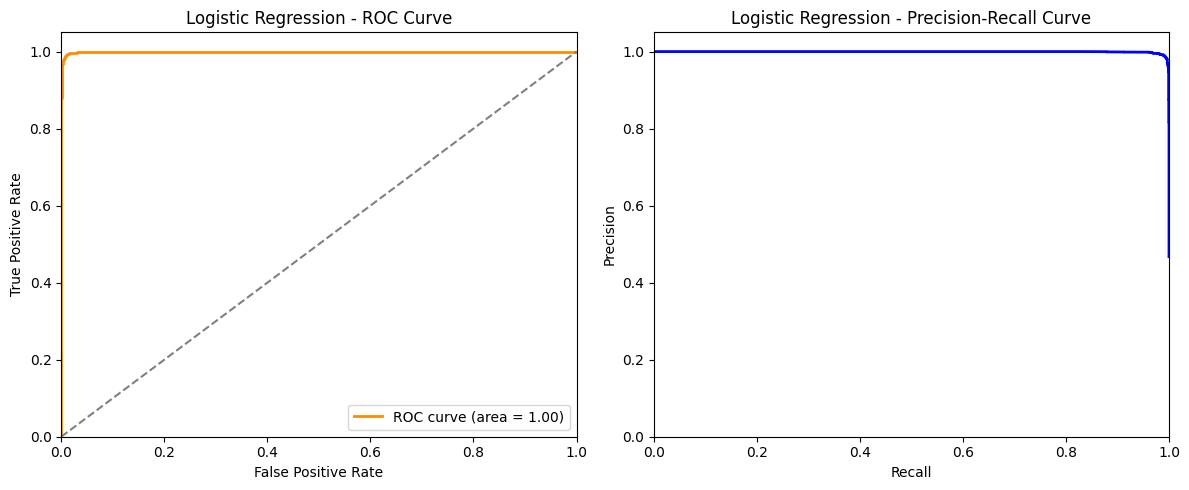

In [18]:
# Logistic Regression Plot
y_pred_proba_lr = lr_model.predict_proba(X_test)[:, 1]
plot_metrics(y_test, y_pred_proba_lr, "Logistic Regression")

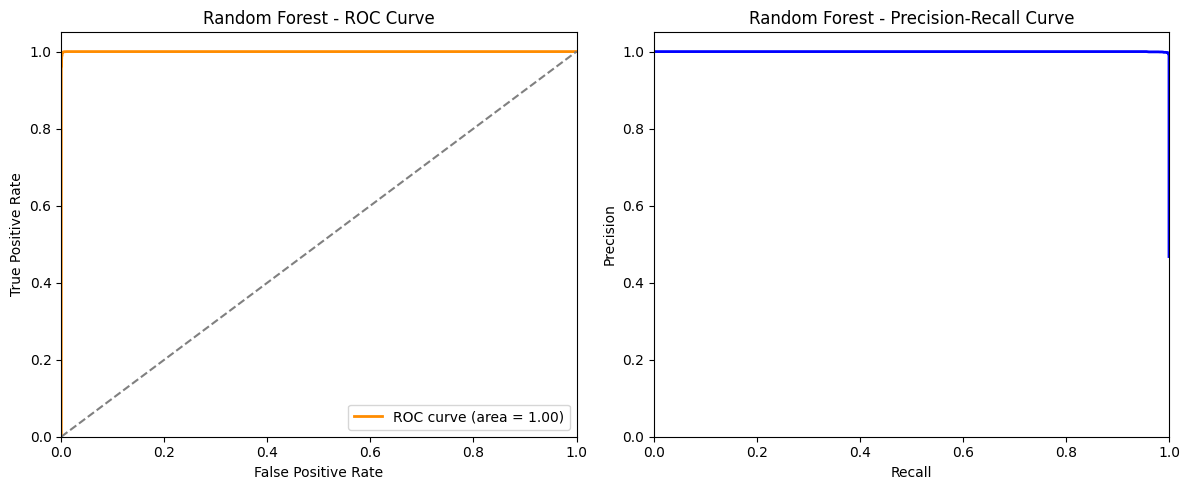

In [20]:
# Random Forest Plot
y_pred_proba_rf = rf_model.predict_proba(X_test)[:, 1]
plot_metrics(y_test, y_pred_proba_rf, "Random Forest")

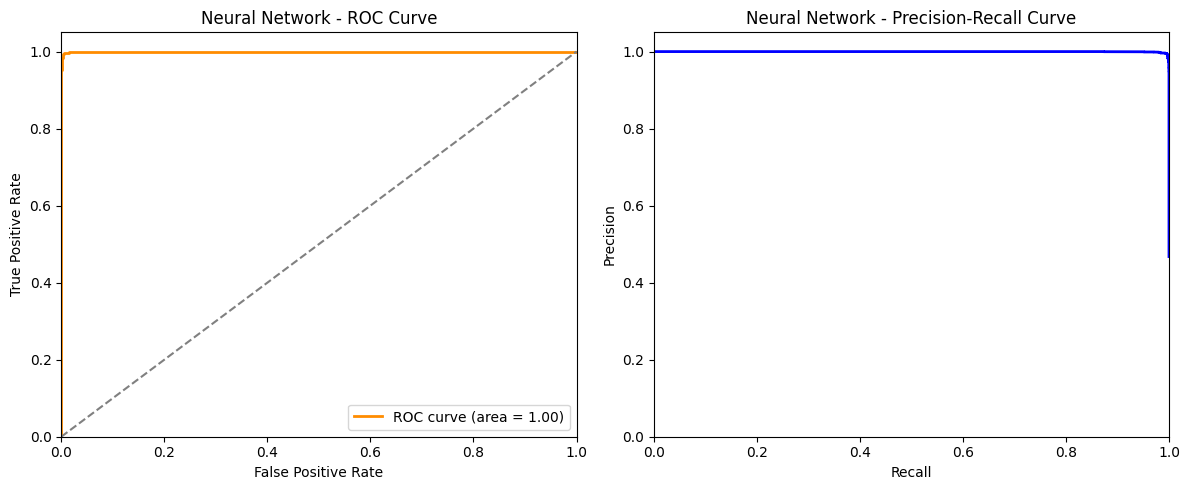

In [22]:
# Neural Network Plot
y_pred_proba_nn = nn_model.predict_proba(X_test)[:, 1]
plot_metrics(y_test, y_pred_proba_nn, "Neural Network")